In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("First few rows of the dataset:")
print(X.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [3]:
# Get feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


In [4]:
# Select top 2 features based on importance
top_features = feature_importance[feature_importance['Importance'] > 0.1]['Feature'].values

print("\nTop features selected:")
print(top_features)


Top features selected:
['petal length (cm)' 'petal width (cm)']


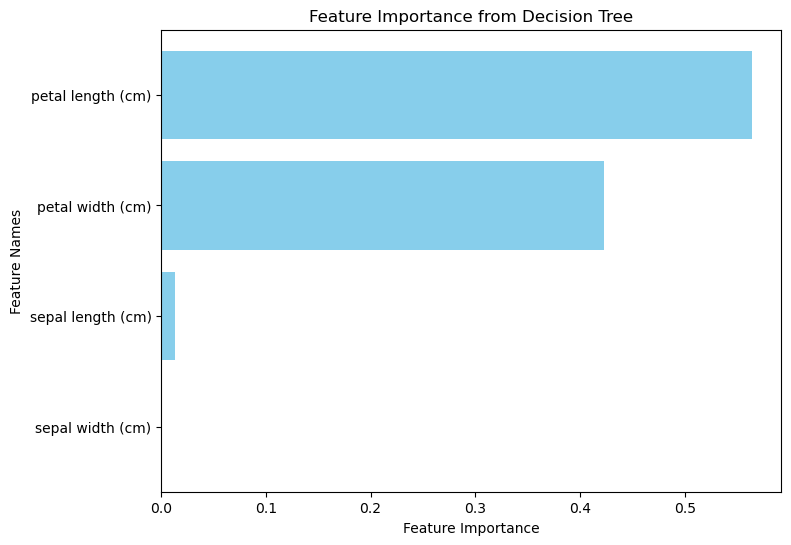

In [5]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [6]:
X_selected = X[top_features]

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train a Random Forest Classifier for feature selection
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head()

,Feature,Importance
23,worst area,0.139357
27,worst concave points,0.132225
7,mean concave points,0.107046
20,worst radius,0.082848
22,worst perimeter,0.080850


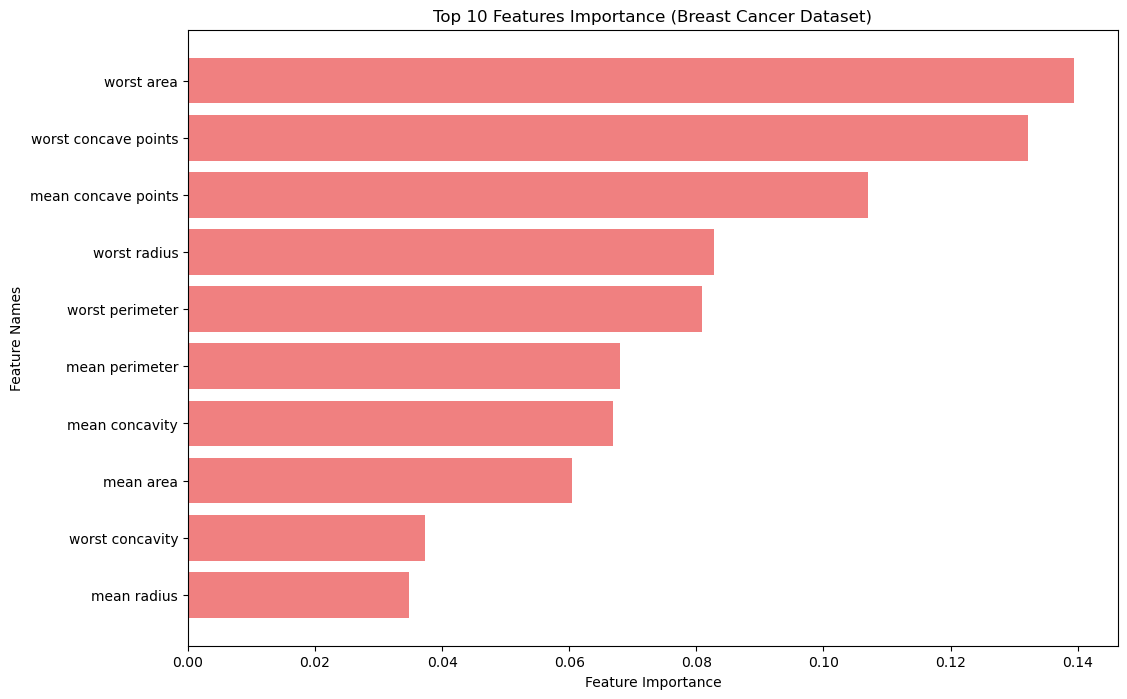

In [9]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='lightcoral')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Top 10 Features Importance (Breast Cancer Dataset)")
plt.gca().invert_yaxis()
plt.show()

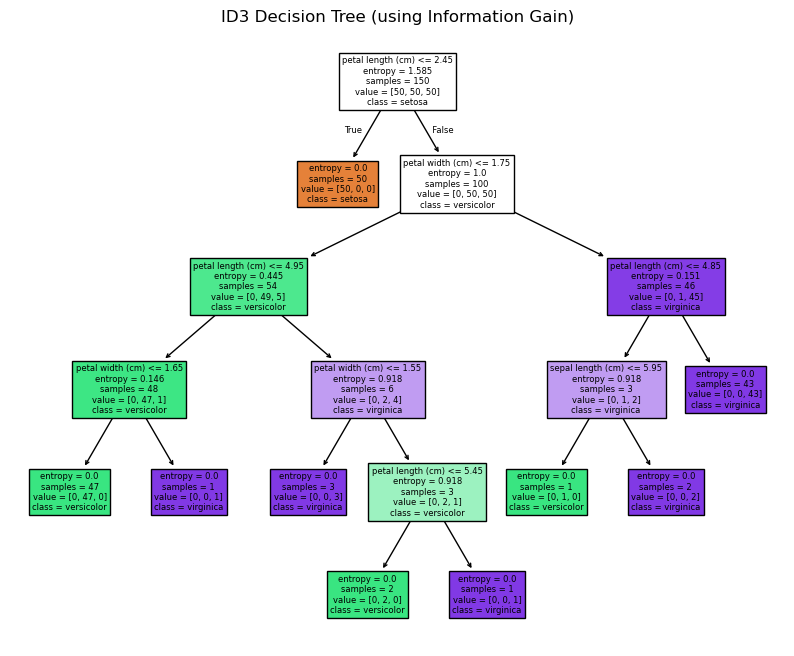

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Train Decision Tree using entropy (ID3 algorithm)
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("ID3 Decision Tree (using Information Gain)")
plt.show()


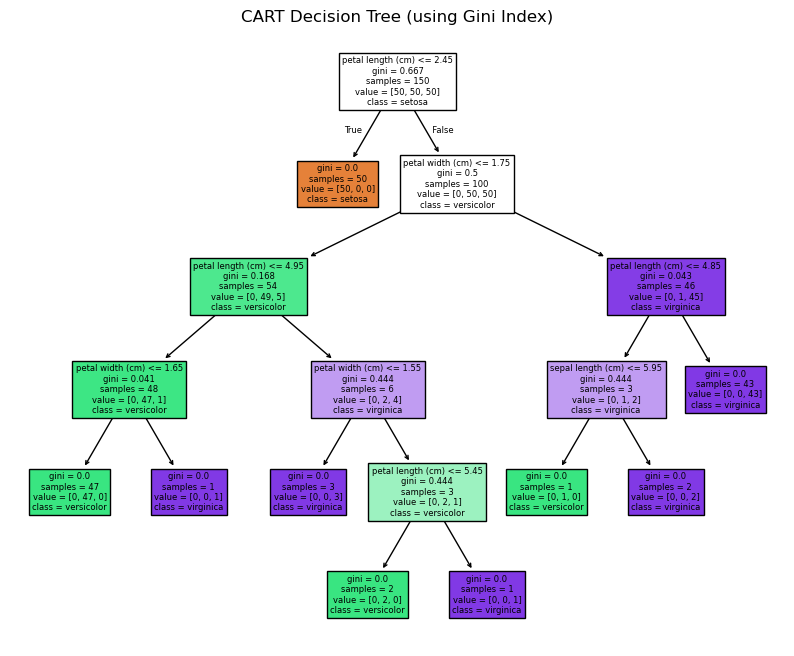

In [11]:
# Train Decision Tree using Gini Index (CART algorithm)
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 8))
tree.plot_tree(cart_tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("CART Decision Tree (using Gini Index)")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predictions
y_pred = rf.predict(X)
print("Random Forest Accuracy:", accuracy_score(y, y_pred))

Random Forest Accuracy: 1.0


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X, y)

# Predictions
y_pred = gb.predict(X)
print("Gradient Boosting Accuracy:", accuracy_score(y, y_pred))

Gradient Boosting Accuracy: 1.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))